In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

In [12]:
def dY_dt(Y, x):
    (u, P) = Y
    dP_dx = -0.5*u**2
    du_dx = -2**(-0.5)*(1.5 - P)**(-0.5)*dP_dx
    return [du_dx, dP_dx]

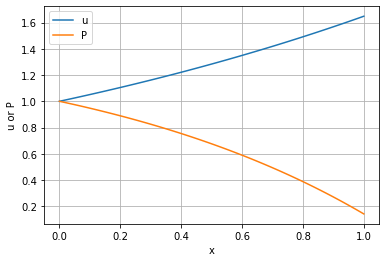

In [14]:
xs = np.linspace(0, 1, 101)
Y0 = [1, 1]
Ys = odeint(dY_dt, Y0, xs)
u = Ys[:, 0]
P = Ys[:, 1]
plt.plot(xs, u, label="u")
plt.plot(xs, P, label="P")
plt.xlabel("x")
plt.ylabel("u or P")
plt.legend()
plt.grid()
plt.show()

In [6]:
a,b,c,d = 1,1,1,1

def dP_dt(P, t):
    return [P[0]*(a - b*P[1]), -P[1]*(c - d*P[0])]

ts = np.linspace(0, 12, 100)
P0 = [1.5, 1.0]
Ps = odeint(dP_dt, P0, ts)
prey = Ps[:,0]
predators = Ps[:,1]

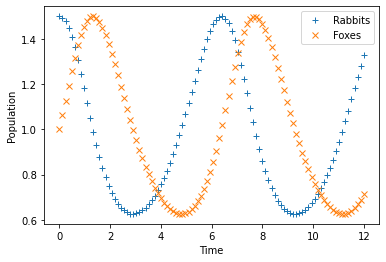

In [7]:
plt.plot(ts, prey, "+", label="Rabbits")
plt.plot(ts, predators, "x", label="Foxes")
plt.xlabel("Time")
plt.ylabel("Population")
plt.legend();

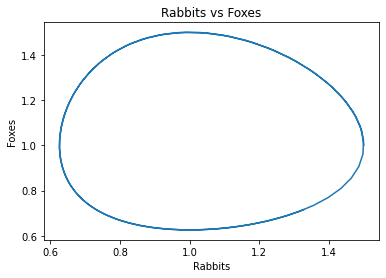

In [8]:
plt.plot(prey, predators, "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

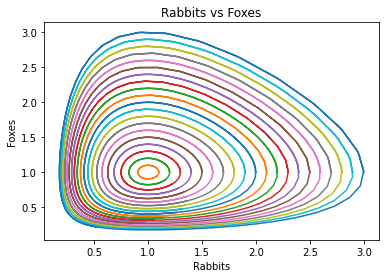

In [9]:
ic = np.linspace(1.0, 3.0, 21)
for r in ic:
    P0 = [r, 1.0]
    Ps = odeint(dP_dt, P0, ts)
    plt.plot(Ps[:,0], Ps[:,1], "-")
plt.xlabel("Rabbits")
plt.ylabel("Foxes")
plt.title("Rabbits vs Foxes");

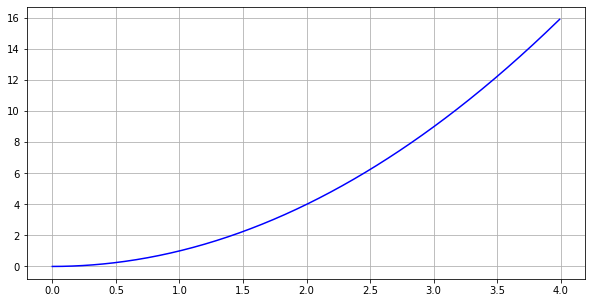

In [17]:
def f(x):
    return x*x

x = np.arange(0,4,0.01)
y = f(x)
 
plt.figure(figsize=(10,5))
plt.plot(x, y, 'b')
plt.grid(axis = 'both')
plt.show()

In [18]:
from scipy.misc import derivative
 
d = derivative(f, 1.0, dx=1e-3)
 
print (d)

1.9999999999998352


In [21]:
dx = np.gradient(x)
dy = np.gradient(y)
dy_dx = dy/dx
print(dy_dx)

[0.01 0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.   1.02 1.04 1.06 1.08 1.1
 1.12 1.14 1.16 1.18 1.2  1.22 1.24 1.26 1.28 1.3  1.32 1.34 1.36 1.38
 1.4  1.42 1.44 1.46 1.48 1.5  1.52 1.54 1.56 1.58 1.6  1.62 1.64 1.66
 1.68 1.7  1.72 1.74 1.76 1.78 1.8  1.82 1.84 1.86 1.88 1.9  1.92 1.94
 1.96 1.98 2.   2.02 2.04 2.06 2.08 2.1  2.12 2.14 2.16 2.18 2.2  2.22
 2.24 2.26 2.28 2.3  2.32 2.34 2.36 2.38 2.4  2.42 2.44 2.46 2.48 2.5
 2.52 2.54 2.56 2.58 2.6  2.62 2.64 2.66 2.68 2.7  2.72 2.74 2.76 2.78
 2.8  2.82 2.84 2.86 2.88 2.9  2.92 2.94 2.96 2.98 3.   3.02 3.04 3.06
 3.08 3.1  3.12 3.14 3.16 3.18 3.2  3.22 3.24 3.26 3.28 3.3  3.32 3.34
 3.36 3.38 3.4  3.42 3.44 3.46 3.48 3.5  3.52 3.54 3.56 3.58 3.6  3.62
 3.64 3.66 3.68 3.7  3.72 3.74 3.76 3.78 3.8  3.82 3.84 3.86 3.88 3.9
 3.92 3.9

In [22]:
xt = np.linspace(0, 1, 3)
yt = np.interp(xt, x, y)

In [23]:
yt

array([0.  , 0.25, 1.  ])

In [25]:
odeint?

Signature:
odeint(
    func,
    y0,
    t,
    args=(),
    Dfun=None,
    col_deriv=0,
    full_output=0,
    ml=None,
    mu=None,
    rtol=None,
    atol=None,
    tcrit=None,
    h0=0.0,
    hmax=0.0,
    hmin=0.0,
    ixpr=0,
    mxstep=0,
    mxhnil=0,
    mxordn=12,
    mxords=5,
    printmessg=0,
    tfirst=False,
)
Docstring:
Integrate a system of ordinary differential equations.

.. note:: For new code, use `scipy.integrate.solve_ivp` to solve a
          differential equation.

Solve a system of ordinary differential equations using lsoda from the
FORTRAN library odepack.

Solves the initial value problem for stiff or non-stiff systems
of first order ode-s::

    dy/dt = func(y, t, ...)  [or func(t, y, ...)]

where y can be a vector.

.. note:: By default, the required order of the first two arguments of
          `func` are in the opposite order of the arguments in the system
          definition function used by the `scipy.integrate.ode` class and
          the function `